In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style(style='darkgrid')

In [4]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
53**0.5

7.280109889280518

In [6]:
21**0.5

4.58257569495584

In [7]:
216+64+1

281

In [8]:
281**(1/3)

6.549911620119374

In [9]:
df = pd.read_csv('customer.csv')

In [10]:
df.head()

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex
0,CUSTID1,15000,18,44,0
1,CUSTID2,15000,18,79,0
2,CUSTID3,16000,23,8,1
3,CUSTID4,16000,25,79,1
4,CUSTID5,17000,32,41,1


<AxesSubplot:xlabel='Cust_Spend_Score', ylabel='Density'>

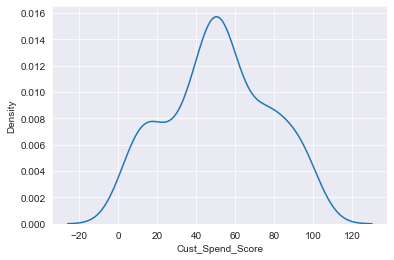

In [11]:
sns.kdeplot(df['Cust_Spend_Score'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Cust_Number       200 non-null    object
 1   Yearly_Income     200 non-null    int64 
 2   Age               200 non-null    int64 
 3   Cust_Spend_Score  200 non-null    int64 
 4   Sex               200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
df.shape

(200, 5)

In [14]:
df['Sex'] = df['Sex'].astype('object')

In [15]:
df.dtypes

Cust_Number         object
Yearly_Income        int64
Age                  int64
Cust_Spend_Score     int64
Sex                 object
dtype: object

In [ ]:
df.drop(columns='Cust_Number',inplace=True)

In [21]:
df.isnull().sum()

Yearly_Income       0
Age                 0
Cust_Spend_Score    0
Sex                 0
dtype: int64

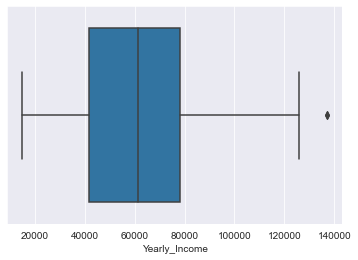

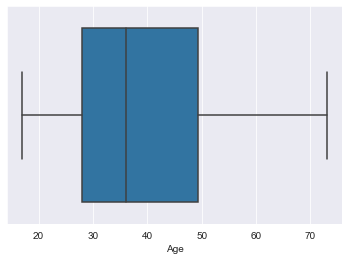

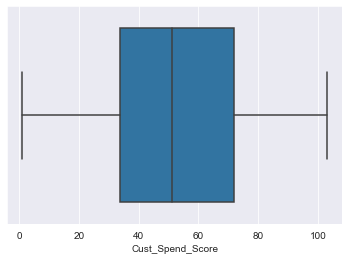

In [23]:
df_num = df.select_dtypes(np.number)
for i in df_num.columns:
    sns.boxplot(df[i])
    plt.show()

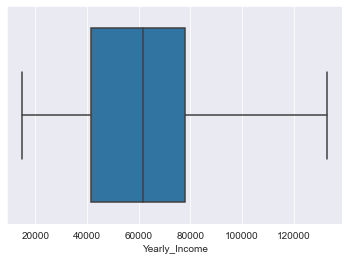

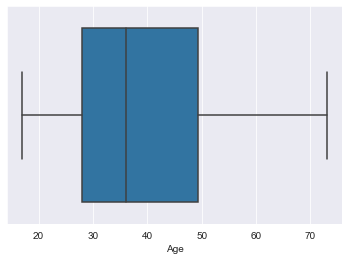

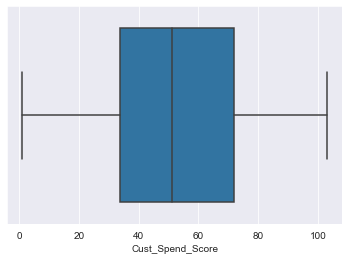

In [26]:
for i in df_num:
    iqr = df[i].quantile(0.75)-df[i].quantile(0.25)
    ul = df[i].quantile(0.75)+1.5*iqr
    ll = df[i].quantile(0.25)-1.5*iqr
    
    for j in df.index:
        if df.loc[j,i]>ul:
            df.loc[j,i]=ul
        elif df.loc[j,i]<ll:
            df.loc[j,i]=ll

for i in df_num.columns:
    sns.boxplot(df[i])
    plt.show()

In [28]:
df1 = df[['Cust_Spend_Score','Yearly_Income']]

In [29]:
df1

,Cust_Spend_Score,Yearly_Income
0,44,15000.0
1,79,15000.0
2,8,16000.0
3,79,16000.0
4,41,17000.0
...,...,...
195,79,120000.0
196,32,126000.0
197,72,126000.0
198,22,132750.0


<AxesSubplot:>

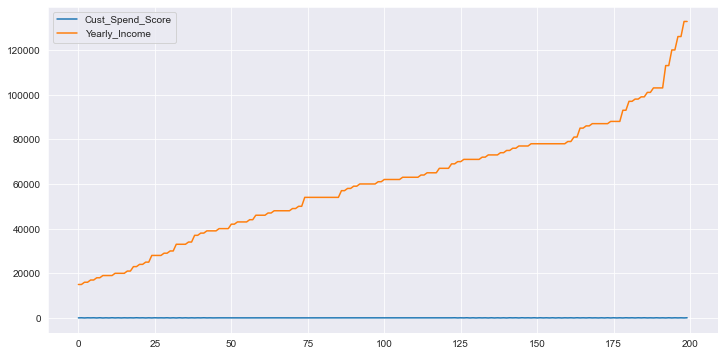

In [33]:
df1.plot(figsize=(12,6))

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

df_sc = pd.DataFrame(sc.fit_transform(df1), columns=df1.columns, index=df1.index)
df_sc

,Cust_Spend_Score,Yearly_Income
0,-0.284181,-1.745429
1,1.063563,-1.745429
2,-1.670433,-1.707083
3,1.063563,-1.707083
4,-0.399702,-1.668737
...,...,...
195,1.063563,2.280936
196,-0.746265,2.511014
197,0.794014,2.511014
198,-1.131335,2.769852


<AxesSubplot:>

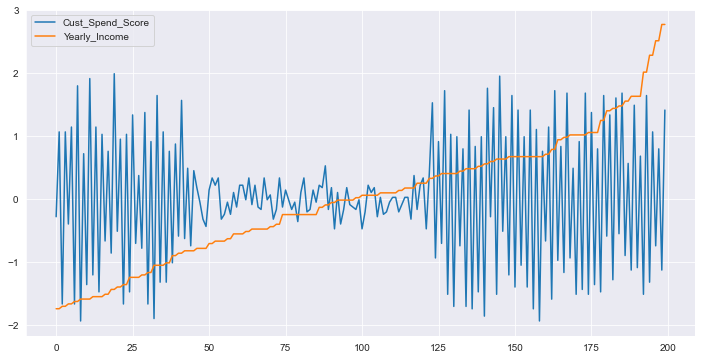

In [37]:
df_sc.plot(figsize=(12,6))

In [46]:
from sklearn.cluster import KMeans
err = []
n = []
for i in range(1,16):
    km = KMeans(n_clusters=i,random_state=1)
    km.fit(df_sc)
    err.append(km.inertia_)
    n.append(i)

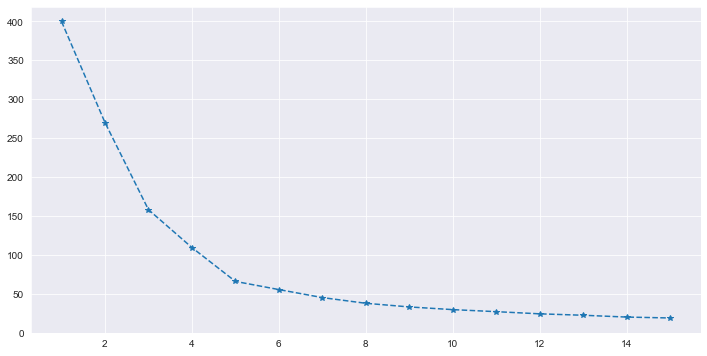

In [47]:
plt.figure(figsize=(12,6))
plt.plot(n,err,'*--')

In [101]:
model = KMeans(n_clusters=5,random_state=100)
model.fit(df_sc)
model.labels_

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4])

In [119]:
df1['labels']=model.labels_
df1['test']=df1['Cust_Spend_Score']*df1['labels']
df1
df1.drop(columns='test', inplace=True)

In [103]:
df1.labels.value_counts()

1    80
4    39
3    37
0    23
2    21
Name: labels, dtype: int64

<AxesSubplot:xlabel='labels', ylabel='count'>

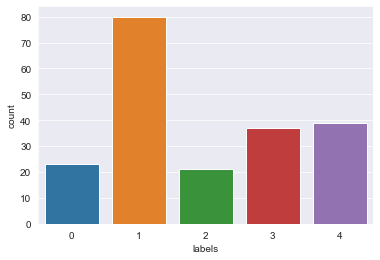

In [104]:
sns.countplot(df1.labels)

<AxesSubplot:xlabel='Cust_Spend_Score', ylabel='Yearly_Income'>

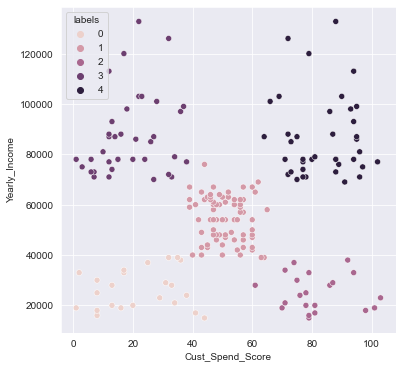

In [105]:
plt.figure(figsize=(6,6))
sns.scatterplot(df1['Cust_Spend_Score'],df1['Yearly_Income'],hue=df1.labels)

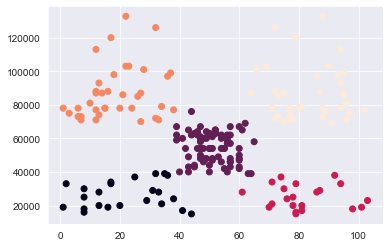

In [106]:
plt.scatter(df1['Cust_Spend_Score'],df1['Yearly_Income'],c=df1.labels)

In [89]:
pip install shapely

In [107]:
model.cluster_centers_

array([[-1.12631231, -1.31194907],
       [-0.00693126, -0.22355915],
       [ 1.16441429, -1.358314  ],
       [-1.24685589,  1.02250249],
       [ 1.23437568,  0.9936298 ]])

In [108]:
df1[df1['labels']==0]

,Cust_Spend_Score,Yearly_Income,labels,test
0,44,15000.0,0,0
2,8,16000.0,0,0
4,41,17000.0,0,0
6,8,18000.0,0,0
8,1,19000.0,0,0
10,16,19000.0,0,0
12,20,20000.0,0,0
14,13,20000.0,0,0
16,34,21000.0,0,0
18,29,23000.0,0,0


In [109]:
df1[df1['labels']==0].describe()

,Cust_Spend_Score,Yearly_Income,labels,test
count,23.000000,23.000000,23.0,23.0
mean,22.130435,26304.347826,0.0,0.0
std,13.222929,7893.811055,0.0,0.0
min,1.000000,15000.000000,0.0,0.0
25%,10.500000,19500.000000,0.0,0.0
50%,20.000000,25000.000000,0.0,0.0
75%,33.500000,33000.000000,0.0,0.0
max,44.000000,39000.000000,0.0,0.0


In [110]:
# Cluster 0 - Inference:
# Low spender, low income 
# max income 39k
# ....

In [112]:
!pip install yellowbrick

  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)


In [116]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

Sil score for 2 clusters is: 0.28386984461182124


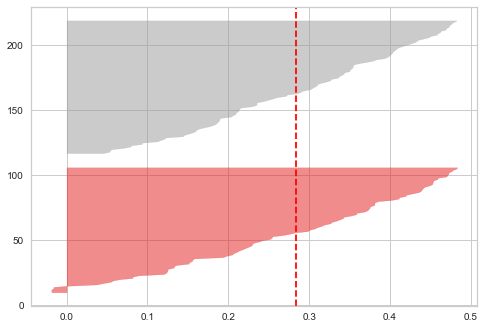

Sil score for 3 clusters is: 0.4660535262676215


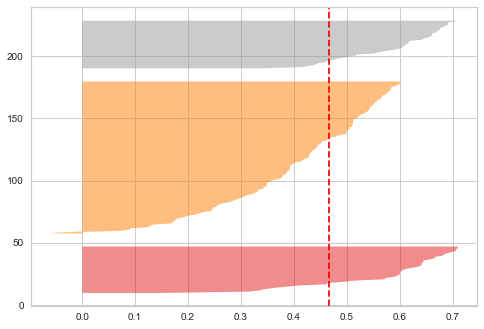

Sil score for 4 clusters is: 0.49162977425424315


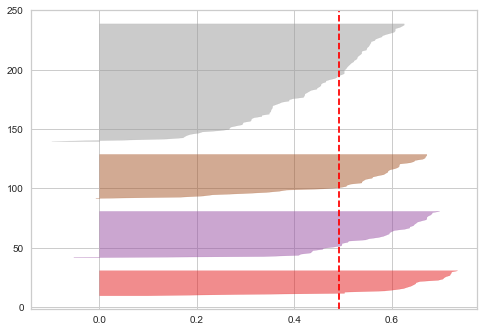

Sil score for 5 clusters is: 0.5529168568533663


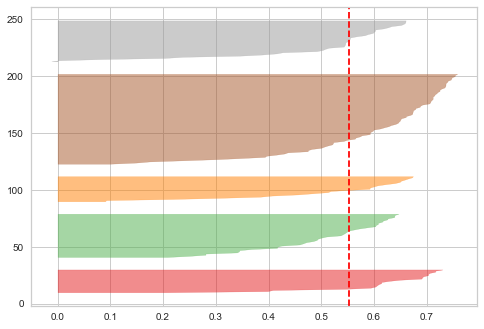

Sil score for 6 clusters is: 0.5406923959259283


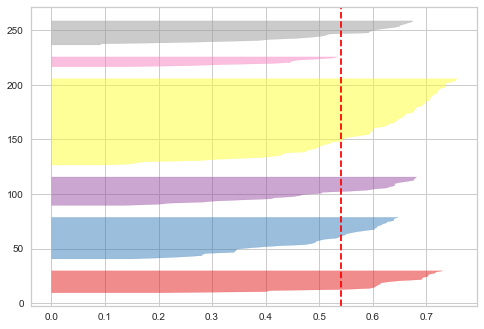

Sil score for 7 clusters is: 0.53057072564984


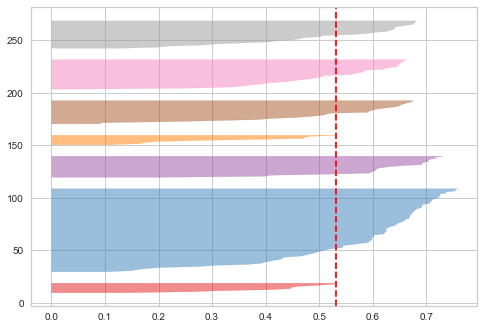

Sil score for 8 clusters is: 0.44760969933134875


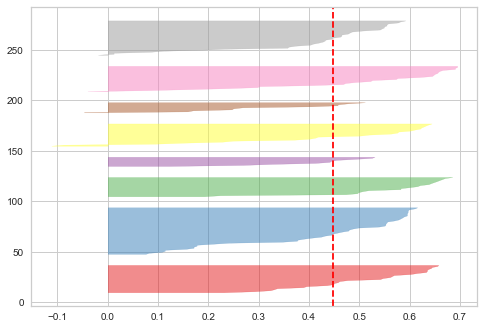

Sil score for 9 clusters is: 0.45471197540861724


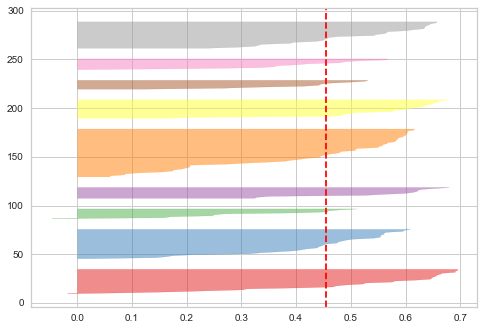

In [130]:
for i in range(2,10):
    km = KMeans(n_clusters=i, random_state=10)
    km.fit(df_sc)
    sil_score = silhouette_score(df_sc, km.labels_)
    print("Sil score for", i, "clusters is:",sil_score)
    
    sv = SilhouetteVisualizer(estimator=km)
    sv.fit(df_sc)
    plt.show()

In [2]:
((0.4-0.35)**2+(0.53-0.32)**2)**0.5

0.21587033144922904

In [3]:
((0.4-0.26)**2+(0.53-0.19)**2)**0.5

0.36769552621700474

In [4]:
df = pd.read_csv('grains.csv')
df

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


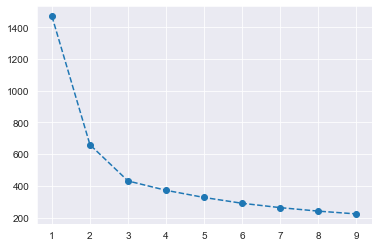

In [23]:
df1 = df.drop(columns='target')

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_sc = pd.DataFrame(sc.fit_transform(df1), columns=df1.columns)
from sklearn.cluster import KMeans

err = []
for i in range(1,10):
    km = KMeans(n_clusters=i,random_state=10)
    km.fit(df_sc)
    err.append(km.inertia_)

plt.plot(range(1,10),err,'o--')

In [24]:
km = KMeans(n_clusters=3,random_state=10)
km.fit(df_sc)
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
df_k = df.copy()
df_k['labels']=km.labels_
df_k.head()

,A,P,C,LK,WK,A_Coef,LKG,target,labels
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0,0


In [26]:
df['target'].value_counts()

0    70
1    70
2    70
Name: target, dtype: int64

In [27]:
df_k['labels'].value_counts()

1    72
0    71
2    67
Name: labels, dtype: int64

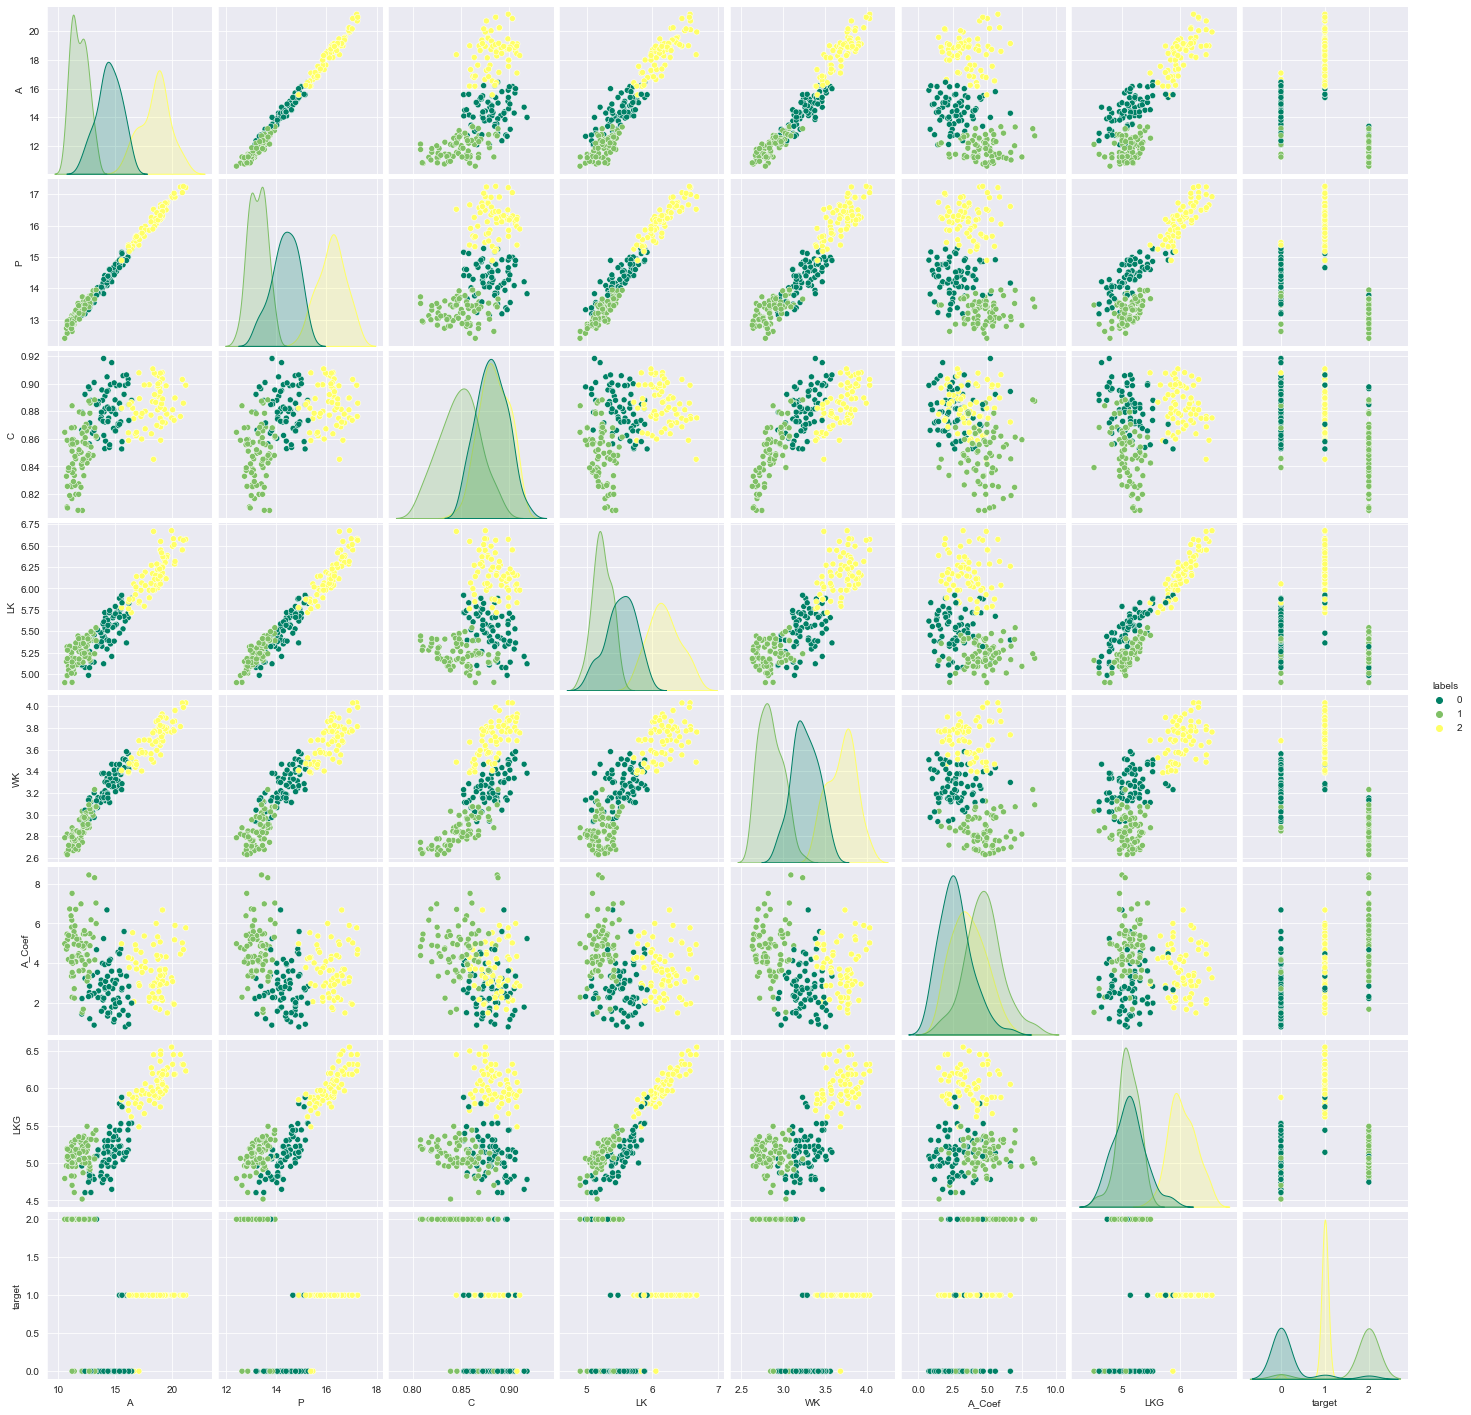

In [31]:
sns.pairplot(df_k, hue='labels', palette='summer')

In [3]:
from scipy.cluster.hierarchy import cophenet,dendrogram,linkage

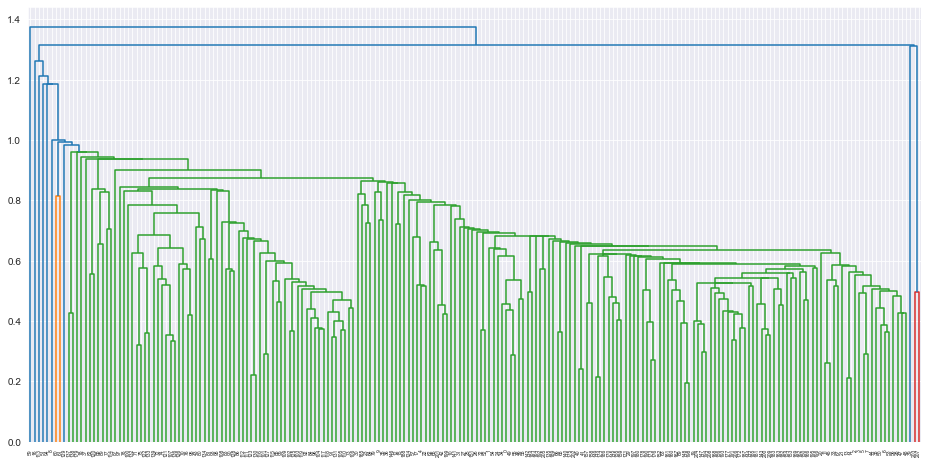

In [34]:
plt.figure(figsize=(16,8))
z = linkage(df_sc, method='single')
dendrogram(z)
plt.show()

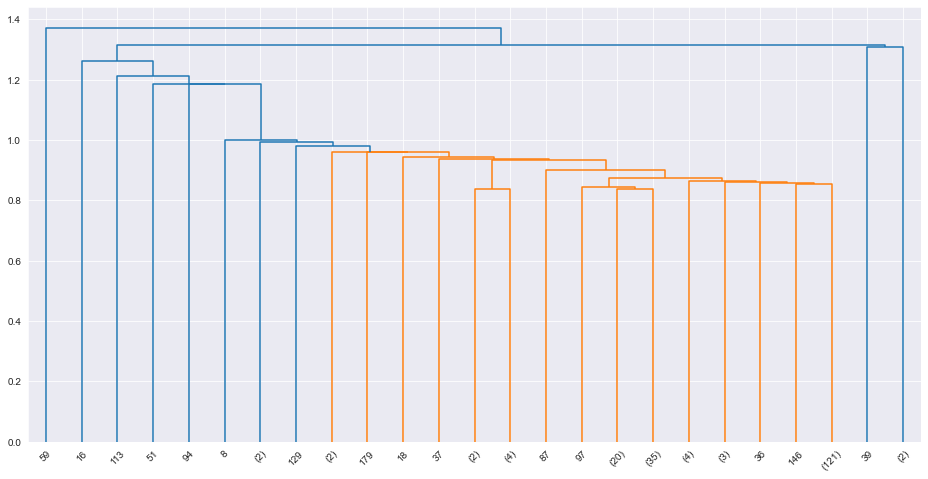

In [38]:
plt.figure(figsize=(16,8))
z = linkage(df_sc, method='single')
dendrogram(z, truncate_mode='lastp', p=25)
plt.show()

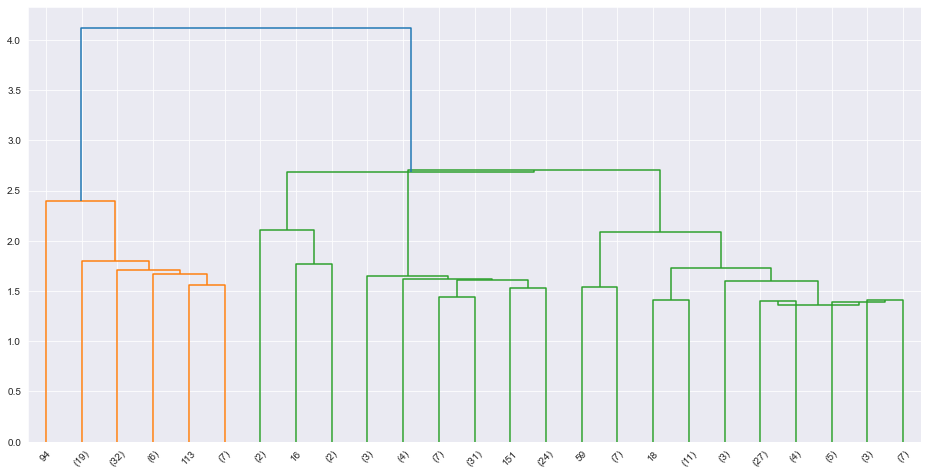

In [39]:
plt.figure(figsize=(16,8))
z = linkage(df_sc, method='centroid')
dendrogram(z, truncate_mode='lastp', p=25)
plt.show()

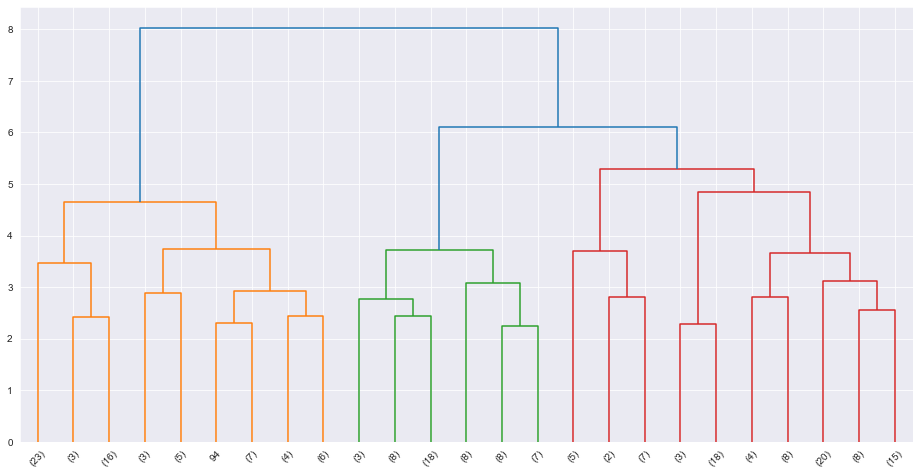

In [40]:
plt.figure(figsize=(16,8))
z = linkage(df_sc, method='complete')
dendrogram(z, truncate_mode='lastp', p=25)
plt.show()

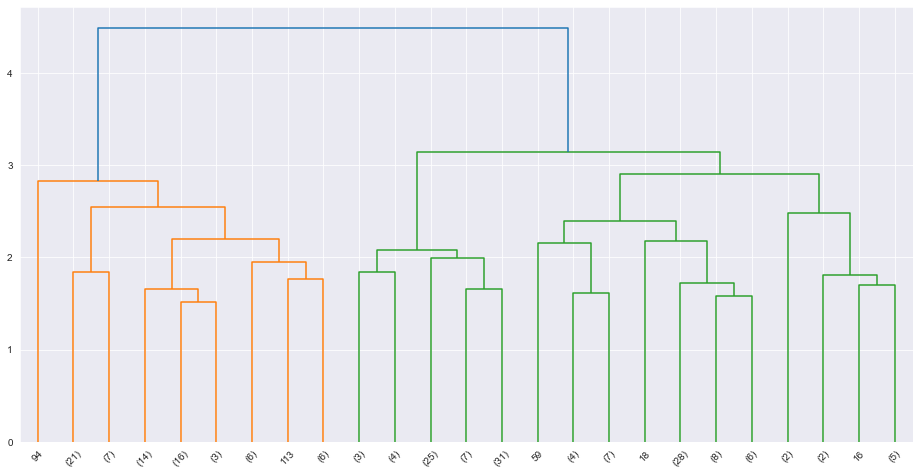

In [45]:
plt.figure(figsize=(16,8))
z = linkage(df_sc, method='average')
dendrogram(z, truncate_mode='lastp', p=25)
plt.show()

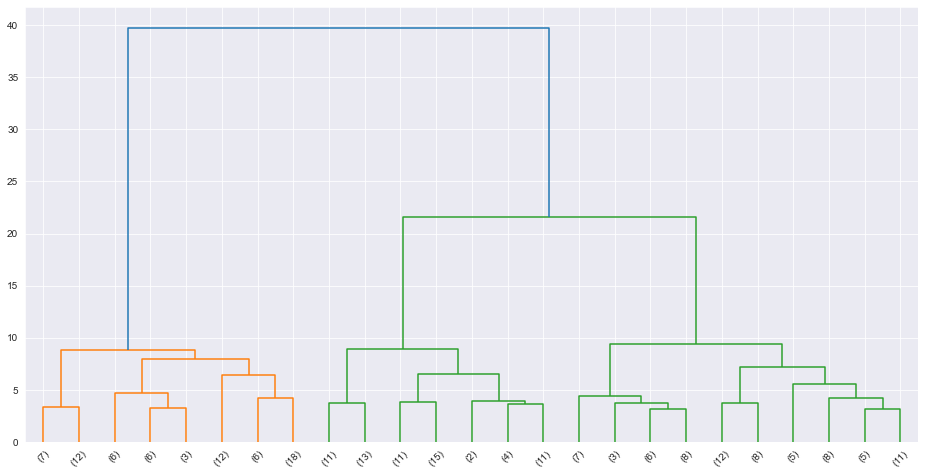

In [43]:
plt.figure(figsize=(16,8))
z = linkage(df_sc, method='ward')
dendrogram(z, truncate_mode='lastp', p=25)
plt.show()

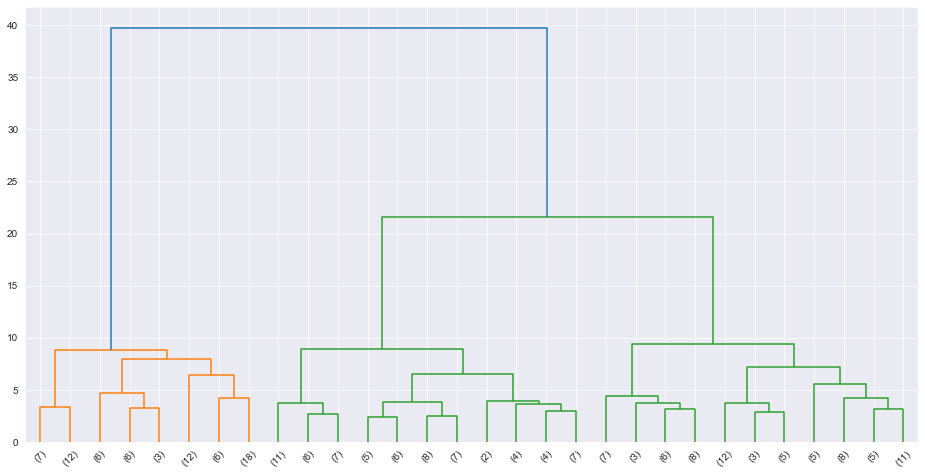

In [47]:
plt.figure(figsize=(16,8))
z = linkage(df_sc, method='ward')
dendrogram(z, truncate_mode='lastp', p=30)
plt.show()

In [49]:
from scipy.spatial.distance import pdist

z = linkage(df_sc, method='single')
c,d = cophenet(z, pdist(df_sc))

print(c)

0.4266838473609089


In [2]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [52]:
for i in range(2,10):
    agc = AgglomerativeClustering(n_clusters=i)
    agc.fit(df_sc)
        
    sil_score = silhouette_score(df_sc, agc.labels_)
    print(i,'cluster:',sil_score)

2 cluster: 0.4612971903388491
3 cluster: 0.3926339709101015
4 cluster: 0.3005761085141328
5 cluster: 0.27463857070040487
6 cluster: 0.21495938096693068
7 cluster: 0.23204105676651238
8 cluster: 0.23272563048709588
9 cluster: 0.22597215110027735


In [53]:
agc1 = AgglomerativeClustering(n_clusters=3)
agc1.fit(df_sc)
agc1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [54]:
df_h = df.copy()
df_h['labels']=agc1.labels_
df_h['target'].value_counts()

0    70
1    70
2    70
Name: target, dtype: int64

In [55]:
df_h['labels'].value_counts()

0    73
1    70
2    67
Name: labels, dtype: int64

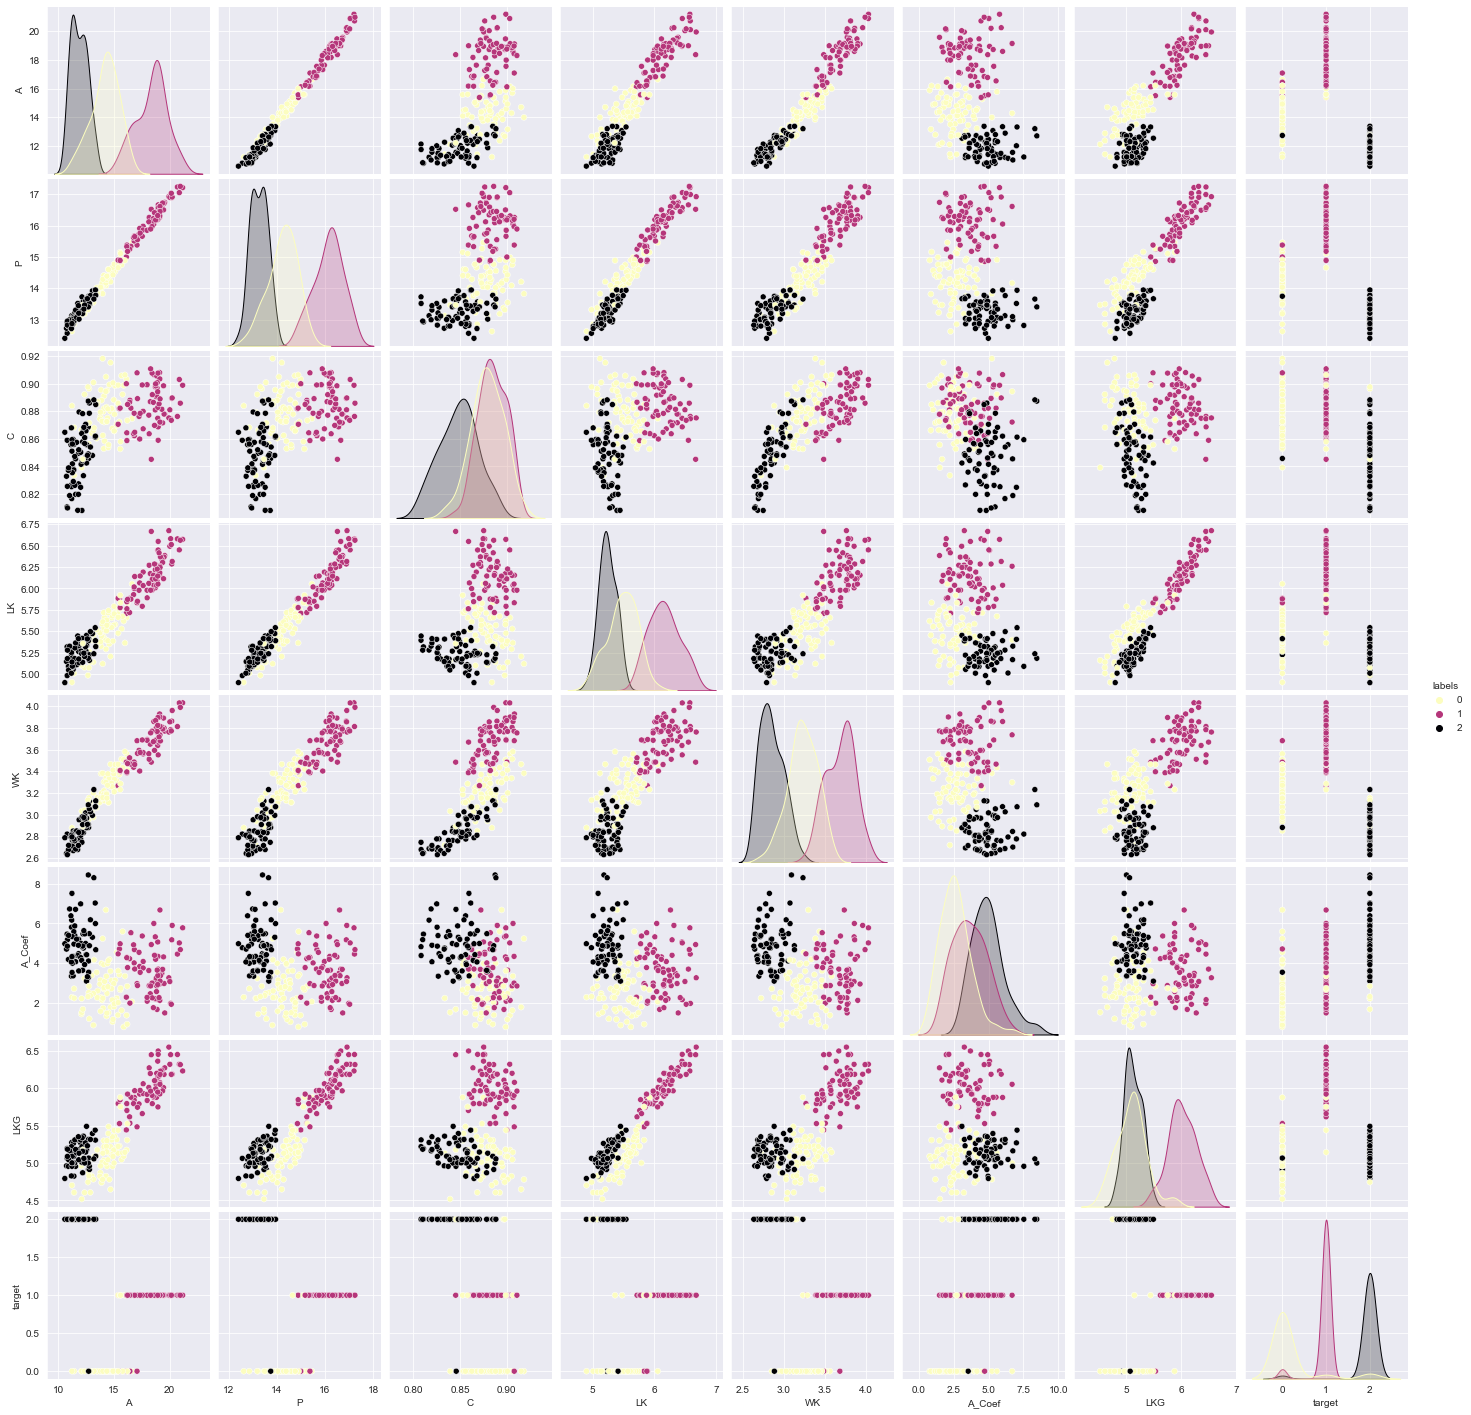

In [60]:
sns.pairplot(df_h, hue='labels', palette='magma_r')

<AxesSubplot:xlabel='LK', ylabel='WK'>

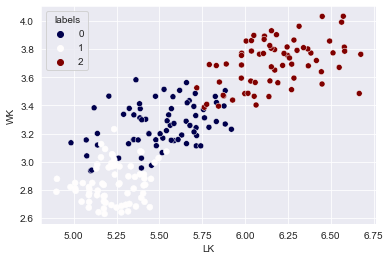

In [73]:
sns.scatterplot(df_k['LK'],df_k['WK'], hue=df_k['labels'], palette='seismic')

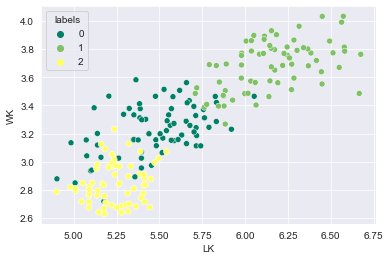

In [74]:
sns.scatterplot(df_h['LK'],df_h['WK'], hue=df_h['labels'], palette='summer')
plt.show()

In [101]:
## KMeans - -  into Supervised---

In [103]:
x = df_k.drop(columns='labels')
y = df_k['labels']

In [104]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=10)

In [105]:
from sklearn.tree import DecisionTreeClassifier
dc_k = DecisionTreeClassifier(random_state=10)
dc_k.fit(xtrain, ytrain)
y_pred = dc_k.predict(xtest)

In [106]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_pred)

0.9761904761904762

In [107]:
##########################  Heirarchial----

In [108]:
x = df_h.drop(columns='labels')
y = df_h['labels']

In [109]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=10)

In [110]:
from sklearn.tree import DecisionTreeClassifier
dc_h = DecisionTreeClassifier(random_state=10)
dc_h.fit(xtrain, ytrain)
y_pred = dc_h.predict(xtest)

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_pred)

0.9047619047619048

In [112]:
### DB Scan

In [113]:
df = pd.read_csv('db_data.csv')
df.head()

,F1,F2,out
0,1.047751,0.071995,0
1,0.020275,0.161049,1
2,-0.671793,0.750891,0
3,-0.774415,0.649314,0
4,-0.379833,0.952658,0


<AxesSubplot:xlabel='F1', ylabel='F2'>

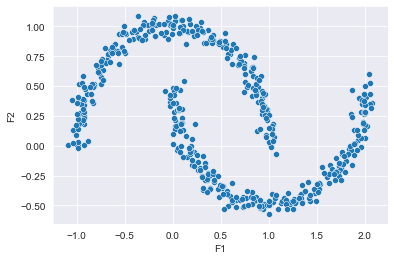

In [115]:
sns.scatterplot(df['F1'],df['F2'])

<AxesSubplot:xlabel='F1', ylabel='F2'>

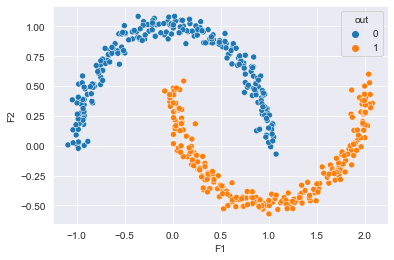

In [116]:
sns.scatterplot(df['F1'],df['F2'], hue=df['out'])

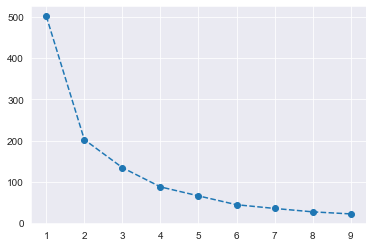

In [119]:
dfi = df.drop(columns='out')
err=[]
for i in range(1,10):
    km = KMeans(n_clusters=i, random_state=10)
    km.fit(dfi)
    err.append(km.inertia_)

plt.plot(range(1,10),err,'o--')

<AxesSubplot:xlabel='F1', ylabel='F2'>

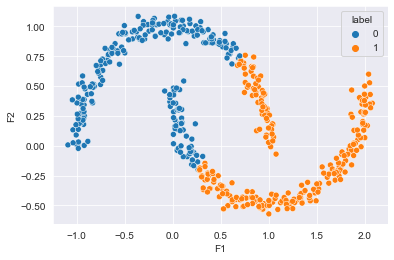

In [124]:
km = KMeans(n_clusters=2, random_state=10)
km.fit(dfi)
dfi['label']=km.labels_
sns.scatterplot(dfi['F1'],dfi['F2'],hue=dfi['label'])

<AxesSubplot:xlabel='F1', ylabel='F2'>

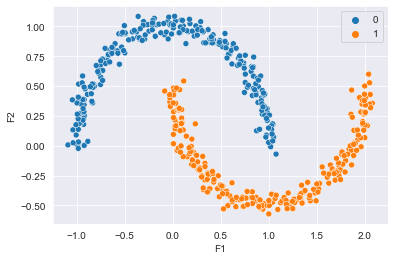

In [133]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5)
db.fit(df[['F1','F2']])
dlab = db.labels_

sns.scatterplot(df['F1'],df['F2'], hue=dlab)

<AxesSubplot:xlabel='F1', ylabel='F2'>

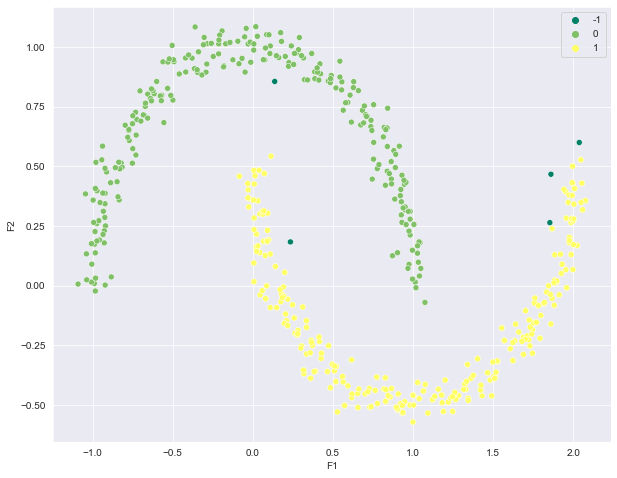

In [141]:
db = DBSCAN(eps=0.1, min_samples=5)
db.fit(df[['F1','F2']])
dlab = db.labels_

plt.figure(figsize=(10,8))
sns.scatterplot(df['F1'],df['F2'], hue=dlab, palette='summer')

In [138]:
#   -1 is NOISE

In [2]:
###########--------------------

In [37]:
mat = np.array([[1,2],[3,4],[5,6]])
mat

array([[1, 2],
       [3, 4],
       [5, 6]])

In [38]:
m = np.mean(mat, axis=0)
m

array([3., 4.])

In [40]:
A = mat - m
A

array([[-2., -2.],
       [ 0.,  0.],
       [ 2.,  2.]])

In [41]:
A.T

array([[-2.,  0.,  2.],
       [-2.,  0.,  2.]])

In [44]:
cov = np.cov(A, rowvar=False)
cov

array([[4., 4.],
       [4., 4.]])

In [19]:
eig_val, eig_vec = np.linalg.eig(cov)

In [21]:
print(eig_val,'\n', eig_vec )

[8. 0.] 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [24]:
pc = eig_vec.T.dot(A.T)
pc

array([[-2.82842712,  0.        ,  2.82842712],
       [ 0.        ,  0.        ,  0.        ]])

In [25]:
pc.T

array([[-2.82842712,  0.        ],
       [ 0.        ,  0.        ],
       [ 2.82842712,  0.        ]])

In [26]:
 # pc2 is all 0, so x2 not needed

In [27]:
from sklearn.decomposition import PCA
mypc = PCA()
mypc.fit_transform(A)

array([[-2.82842712e+00,  4.74426853e-17],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 2.82842712e+00,  4.74426853e-17]])

In [33]:
from sklearn.datasets import load_iris
iris = load_iris()

In [34]:
x = iris.data
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [45]:
cov = np.cov(x_sc, rowvar=False)
cov

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [46]:
eig_val, eig_vec = np.linalg.eig(cov)
print(eig_val,'\n', eig_vec)

[2.93808505 0.9201649  0.14774182 0.02085386] 
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [49]:
var_exp = eig_val/sum(eig_val)*100
var_exp                                    #variance explained

array([72.96244541, 22.85076179,  3.66892189,  0.51787091])

In [50]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp                #cummulative variance explained

array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

<BarContainer object of 4 artists>

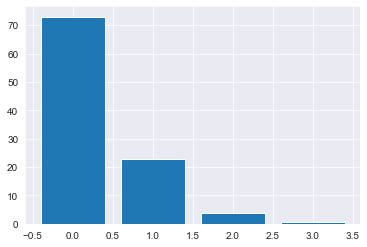

In [56]:
plt.bar(range(4),var_exp)

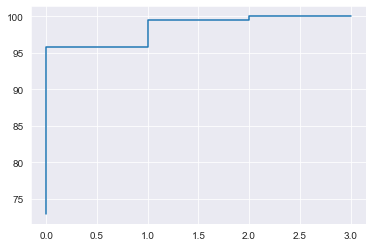

In [58]:
plt.step(range(4), cum_var_exp)

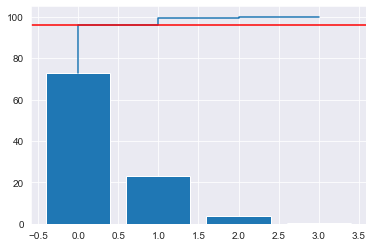

In [59]:
plt.bar(range(4),var_exp)
plt.step(range(4), cum_var_exp)
plt.axhline(96, c='r')

In [60]:
# so 2 components (pc1 and pc2) are enough to explain 96% of variation

In [61]:
from sklearn.decomposition import PCA
mypca = PCA(n_components=2)  # 2 pcs
pca_2 = mypca.fit_transform(x_sc)

In [62]:
pca_df = pd.DataFrame(pca_2)
pca_df

,0,1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [65]:
from sklearn.cluster import KMeans
err = []
for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(pca_df)
    print(km.inertia_)

574.8792432000104
197.40381604541287
115.02075663594015
89.51333472314347
66.21951118837323
57.159093596115476
47.74018038887784
39.02587613338709
32.104335949480976


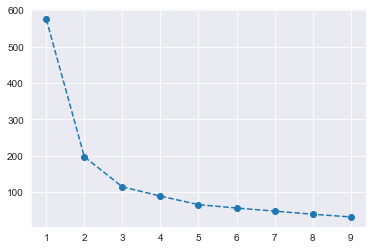

In [67]:
err = []
for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(pca_df)
    err.append(km.inertia_)

plt.plot(range(1,10),err,'o--')

In [68]:
km1 = KMeans(n_clusters=3)
km1.fit(pca_df)
pca_df['labels'] = km1.labels_

<AxesSubplot:xlabel='0', ylabel='1'>

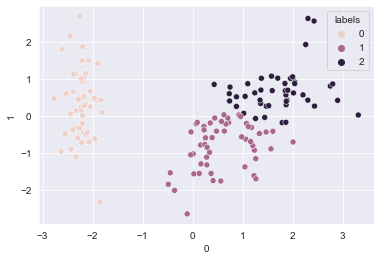

In [70]:
sns.scatterplot(pca_df[0],pca_df[1], hue=pca_df['labels'])

In [71]:
#---------------

In [72]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [74]:
x=iris.data
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [75]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
mylda = LDA()
inp_lda = mylda.fit_transform(x,y)

In [76]:
inp_lda

array([[ 8.06179978e+00,  3.00420621e-01],
       [ 7.12868772e+00, -7.86660426e-01],
       [ 7.48982797e+00, -2.65384488e-01],
       [ 6.81320057e+00, -6.70631068e-01],
       [ 8.13230933e+00,  5.14462530e-01],
       [ 7.70194674e+00,  1.46172097e+00],
       [ 7.21261762e+00,  3.55836209e-01],
       [ 7.60529355e+00, -1.16338380e-02],
       [ 6.56055159e+00, -1.01516362e+00],
       [ 7.34305989e+00, -9.47319209e-01],
       [ 8.39738652e+00,  6.47363392e-01],
       [ 7.21929685e+00, -1.09646389e-01],
       [ 7.32679599e+00, -1.07298943e+00],
       [ 7.57247066e+00, -8.05464137e-01],
       [ 9.84984300e+00,  1.58593698e+00],
       [ 9.15823890e+00,  2.73759647e+00],
       [ 8.58243141e+00,  1.83448945e+00],
       [ 7.78075375e+00,  5.84339407e-01],
       [ 8.07835876e+00,  9.68580703e-01],
       [ 8.02097451e+00,  1.14050366e+00],
       [ 7.49680227e+00, -1.88377220e-01],
       [ 7.58648117e+00,  1.20797032e+00],
       [ 8.68104293e+00,  8.77590154e-01],
       [ 6.

In [81]:
mylda.explained_variance_ratio_

array([0.9912126, 0.0087874])

In [85]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
mylda = LinearDiscriminantAnalysis()
mylda.fit_transform(x,y)
mylda.explained_variance_ratio_

array([0.9912126, 0.0087874])

In [84]:
mylda.explained_variance_ratio_

array([0.9912126, 0.0087874])